<a href="https://colab.research.google.com/github/Nhatnguyen2001/AI_Exercise/blob/main/CNN_FRUIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NGUYỄN ĐÌNH NHẬT**

In [68]:
import glob
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
training_set=train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN_CNN/FRUIT/train/train',target_size=(150,150), batch_size=40, class_mode='categorical')
validation_set=validation.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN_CNN/FRUIT/train/val',target_size=(150,150), batch_size=40, class_mode='categorical')

Found 338 images belonging to 10 classes.
Found 328 images belonging to 10 classes.


In [71]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'passionfruit': 0,
 'peaches': 1,
 'pears': 2,
 'pineapples': 3,
 'plums': 4,
 'pomegranates': 5,
 'raspberries': 6,
 'strawberries': 7,
 'tomatoes': 8,
 'watermelons': 9}

In [72]:
#Tạo Model
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 18, 18, 64)      

In [73]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',  metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(training_set, epochs = 10, validation_data = validation_set, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=15)])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
9/9 [==============================] - 121s 14s/step - loss: 77.6720 - accuracy: 0.1450 - val_loss: 22.5255 - val_accuracy: 0.1646
Epoch 2/10
9/9 [==============================] - 17s 2s/step - loss: 9.9334 - accuracy: 0.2367 - val_loss: 7.0999 - val_accuracy: 0.2896
Epoch 3/10
9/9 [==============================] - 17s 2s/step - loss: 4.0080 - accuracy: 0.4142 - val_loss: 1.7653 - val_accuracy: 0.5488
Epoch 4/10
9/9 [==============================] - 17s 2s/step - loss: 0.8225 - accuracy: 0.7604 - val_loss: 0.4665 - val_accuracy: 0.8628
Epoch 5/10
9/9 [==============================] - 17s 2s/step - loss: 1.9224 - accuracy: 0.7189 - val_loss: 28.0219 - val_accuracy: 0.2287
Epoch 6/10
9/9 [==============================] - 17s 2s/step - loss: 23.2777 - accuracy: 0.2751 - val_loss: 3.8882 - val_accuracy: 0.5061
Epoch 7/10
9/9 [==============================] - 17s 2s/step - loss: 0.8994 - accuracy: 0.8402 - val_loss: 0.0833 - val_accuracy: 0.9817
Epoch 8/10
9/9 [============

In [74]:
model.save('CNN_FRUIT.h5')

Sai số kiểm tra là:  0.010267353616654873
Độ chính xác kiểm tra là:  1.0


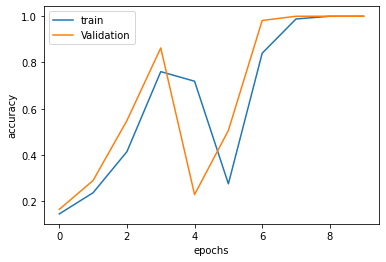

In [75]:
score = model.evaluate(validation_set,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [76]:
CNN_FRUIT =load_model('CNN_FRUIT.h5')

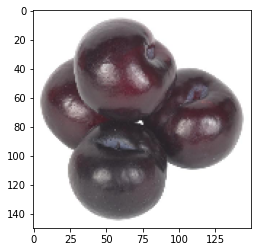

In [85]:
img_path = '/content/drive/MyDrive/Colab Notebooks/BTVN_CNN/FRUIT/test/48.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
Fruit=np.argmax(CNN_FRUIT.predict(img),axis=1)
pred = model.predict(img)
classes = ['passionfruit','peaches','pears','pineapples','plums','pomegranates','raspberries','strawberries','tomatoes','watermelons']

In [86]:
print(np.argmax(pred))
if Fruit==0: print(classes[0])
elif Fruit==1: print(classes[1])
elif Fruit==2: print(classes[2])
elif Fruit==3: print(classes[3])
elif Fruit==4: print(classes[4])
elif Fruit==5: print(classes[5])
elif Fruit==6: print(classes[6])
elif Fruit==7: print(classes[7])
elif Fruit==8: print(classes[8])
elif Fruit==9: print(classes[9])

4
plums
